In [1]:
import numpy  as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams
import itertools

In [2]:
data =pd.read_csv('Hamburg_station_fa4020f94e74.csv')
data.head()


,id,stid,e5,e10,diesel,date,changed
0,3298,7a5ee48a-680a-49e3-8705-fa4020f94e74,1279,1259,1009,5/1/2016 21:26,63
1,16852,7a5ee48a-680a-49e3-8705-fa4020f94e74,1399,1379,1149,5/1/2016 22:05,21
2,36583,7a5ee48a-680a-49e3-8705-fa4020f94e74,1319,1299,1029,5/2/2016 6:33,21
3,57550,7a5ee48a-680a-49e3-8705-fa4020f94e74,1289,1269,1029,5/2/2016 9:29,20
4,65642,7a5ee48a-680a-49e3-8705-fa4020f94e74,1269,1249,1009,5/2/2016 10:49,21


In [3]:
print(data.dtypes)


id          int64
stid       object
e5          int64
e10         int64
diesel      int64
date       object
changed     int64
dtype: object


In [4]:
data.reset_index(drop=True)

,id,stid,e5,e10,diesel,date,changed
0,3298,7a5ee48a-680a-49e3-8705-fa4020f94e74,1279,1259,1009,5/1/2016 21:26,63
1,16852,7a5ee48a-680a-49e3-8705-fa4020f94e74,1399,1379,1149,5/1/2016 22:05,21
2,36583,7a5ee48a-680a-49e3-8705-fa4020f94e74,1319,1299,1029,5/2/2016 6:33,21
3,57550,7a5ee48a-680a-49e3-8705-fa4020f94e74,1289,1269,1029,5/2/2016 9:29,20
4,65642,7a5ee48a-680a-49e3-8705-fa4020f94e74,1269,1249,1009,5/2/2016 10:49,21
5,75437,7a5ee48a-680a-49e3-8705-fa4020f94e74,1309,1289,1049,5/2/2016 12:05,21
6,91668,7a5ee48a-680a-49e3-8705-fa4020f94e74,1289,1269,1029,5/2/2016 13:41,21
7,92341,7a5ee48a-680a-49e3-8705-fa4020f94e74,1269,1249,1009,5/2/2016 13:45,21
8,133713,7a5ee48a-680a-49e3-8705-fa4020f94e74,1399,1379,1149,5/2/2016 22:02,21
9,152637,7a5ee48a-680a-49e3-8705-fa4020f94e74,1319,1299,1059,5/3/2016 6:25,21


In [5]:
print(data.columns)

Index(['id', 'stid', 'e5', 'e10', 'diesel', 'date', 'changed'], dtype='object')


In [6]:
from datetime import datetime
con=data['date']
data['date']=pd.to_datetime(data['date'])
data.set_index('date',inplace=True)
data.index

DatetimeIndex(['2016-05-01 21:26:00', '2016-05-01 22:05:00',
               '2016-05-02 06:33:00', '2016-05-02 09:29:00',
               '2016-05-02 10:49:00', '2016-05-02 12:05:00',
               '2016-05-02 13:41:00', '2016-05-02 13:45:00',
               '2016-05-02 22:02:00', '2016-05-03 06:25:00',
               ...
               '2018-10-10 09:01:00', '2018-10-10 12:00:00',
               '2018-10-10 13:25:00', '2018-10-10 13:53:00',
               '2018-10-10 15:31:00', '2018-10-10 17:00:00',
               '2018-10-10 17:53:00', '2018-10-10 18:01:00',
               '2018-10-10 18:29:00', '2018-10-10 22:00:00'],
              dtype='datetime64[ns]', name='date', length=9413, freq=None)

In [7]:
print(data.columns)

Index(['id', 'stid', 'e5', 'e10', 'diesel', 'changed'], dtype='object')


In [8]:
data.head(100)

,id,stid,e5,e10,diesel,changed
date,,,,,,
2016-05-01 21:26:00,3298,7a5ee48a-680a-49e3-8705-fa4020f94e74,1279,1259,1009,63
2016-05-01 22:05:00,16852,7a5ee48a-680a-49e3-8705-fa4020f94e74,1399,1379,1149,21
2016-05-02 06:33:00,36583,7a5ee48a-680a-49e3-8705-fa4020f94e74,1319,1299,1029,21
2016-05-02 09:29:00,57550,7a5ee48a-680a-49e3-8705-fa4020f94e74,1289,1269,1029,20
2016-05-02 10:49:00,65642,7a5ee48a-680a-49e3-8705-fa4020f94e74,1269,1249,1009,21
2016-05-02 12:05:00,75437,7a5ee48a-680a-49e3-8705-fa4020f94e74,1309,1289,1049,21
2016-05-02 13:41:00,91668,7a5ee48a-680a-49e3-8705-fa4020f94e74,1289,1269,1029,21
2016-05-02 13:45:00,92341,7a5ee48a-680a-49e3-8705-fa4020f94e74,1269,1249,1009,21
2016-05-02 22:02:00,133713,7a5ee48a-680a-49e3-8705-fa4020f94e74,1399,1379,1149,21


In [9]:
data.tail(50)

,id,stid,e5,e10,diesel,changed
date,,,,,,
2018-10-06 13:25:00,138031761,7a5ee48a-680a-49e3-8705-fa4020f94e74,1529,1509,1379,21
2018-10-06 13:53:00,138039020,7a5ee48a-680a-49e3-8705-fa4020f94e74,1489,1469,1339,21
2018-10-06 17:00:00,138069071,7a5ee48a-680a-49e3-8705-fa4020f94e74,1539,1519,1389,21
2018-10-06 17:28:00,138082453,7a5ee48a-680a-49e3-8705-fa4020f94e74,1529,1509,1379,21
2018-10-06 18:33:00,138098537,7a5ee48a-680a-49e3-8705-fa4020f94e74,1489,1469,1339,21
2018-10-06 22:00:00,138116895,7a5ee48a-680a-49e3-8705-fa4020f94e74,1539,1519,1389,21
2018-10-07 06:00:00,138124572,7a5ee48a-680a-49e3-8705-fa4020f94e74,1619,1599,1479,21
2018-10-07 07:26:00,138138794,7a5ee48a-680a-49e3-8705-fa4020f94e74,1569,1549,1419,21
2018-10-07 10:41:00,138176483,7a5ee48a-680a-49e3-8705-fa4020f94e74,1549,1529,1399,21


In [10]:
del data['id']

In [11]:

del data['stid']


In [12]:
del data['e5']


In [13]:
del data['e10']

In [14]:
del data['changed']


In [15]:
data.head()

,diesel
date,
2016-05-01 21:26:00,1009
2016-05-01 22:05:00,1149
2016-05-02 06:33:00,1029
2016-05-02 09:29:00,1029
2016-05-02 10:49:00,1009


In [16]:
print(data.dtypes)

diesel    int64
dtype: object


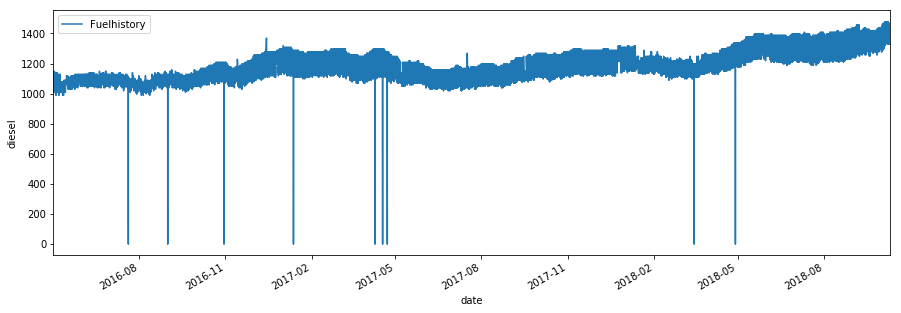

In [17]:
my_plot=data.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])

In [18]:
data.isnull()

,diesel
date,
2016-05-01 21:26:00,False
2016-05-01 22:05:00,False
2016-05-02 06:33:00,False
2016-05-02 09:29:00,False
2016-05-02 10:49:00,False
2016-05-02 12:05:00,False
2016-05-02 13:41:00,False
2016-05-02 13:45:00,False
2016-05-02 22:02:00,False


In [19]:
data.describe()

,diesel
count,9413.000000
mean,1167.637948
std,94.178391
min,0.000000
25%,1109.000000
50%,1159.000000
75%,1229.000000
max,1479.000000


In [20]:
data = data[~np.all(data == 0, axis=1)]

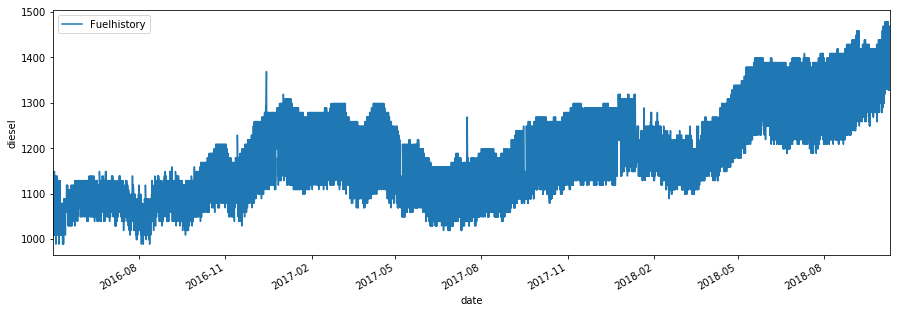

In [21]:
my_plot=data.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])

In [22]:
data.isnull()

,diesel
date,
2016-05-01 21:26:00,False
2016-05-01 22:05:00,False
2016-05-02 06:33:00,False
2016-05-02 09:29:00,False
2016-05-02 10:49:00,False
2016-05-02 12:05:00,False
2016-05-02 13:41:00,False
2016-05-02 13:45:00,False
2016-05-02 22:02:00,False


In [23]:
data=data['2016-5-2':'2018-10-9']
print(data.dtypes)

diesel    int64
dtype: object


In [24]:
print(data.index[0],data.index[-1])

2016-05-02 06:33:00 2018-10-09 22:00:00


In [25]:
mid=pd.date_range(data.index[0],data.index[-1],freq="H",normalize=True)
mid

DatetimeIndex(['2016-05-02 00:00:00', '2016-05-02 01:00:00',
               '2016-05-02 02:00:00', '2016-05-02 03:00:00',
               '2016-05-02 04:00:00', '2016-05-02 05:00:00',
               '2016-05-02 06:00:00', '2016-05-02 07:00:00',
               '2016-05-02 08:00:00', '2016-05-02 09:00:00',
               ...
               '2018-10-08 15:00:00', '2018-10-08 16:00:00',
               '2018-10-08 17:00:00', '2018-10-08 18:00:00',
               '2018-10-08 19:00:00', '2018-10-08 20:00:00',
               '2018-10-08 21:00:00', '2018-10-08 22:00:00',
               '2018-10-08 23:00:00', '2018-10-09 00:00:00'],
              dtype='datetime64[ns]', length=21361, freq='H')

In [26]:
new_index=mid.union(data.index)
#print(new_index)

upsampled_data=data.reindex(new_index)
upsampled_data.head(20)


,diesel
2016-05-02 00:00:00,NaN
2016-05-02 01:00:00,NaN
2016-05-02 02:00:00,NaN
2016-05-02 03:00:00,NaN
2016-05-02 04:00:00,NaN
2016-05-02 05:00:00,NaN
2016-05-02 06:00:00,NaN
2016-05-02 06:33:00,1029.0
2016-05-02 07:00:00,NaN
2016-05-02 08:00:00,NaN


In [27]:
upsampled_data.isnull()



,diesel
2016-05-02 00:00:00,True
2016-05-02 01:00:00,True
2016-05-02 02:00:00,True
2016-05-02 03:00:00,True
2016-05-02 04:00:00,True
2016-05-02 05:00:00,True
2016-05-02 06:00:00,True
2016-05-02 06:33:00,False
2016-05-02 07:00:00,True
2016-05-02 08:00:00,True


In [28]:
upsampled_data = upsampled_data.iloc[7:]
upsampled_data.head(100)


,diesel
2016-05-02 06:33:00,1029.0
2016-05-02 07:00:00,NaN
2016-05-02 08:00:00,NaN
2016-05-02 09:00:00,NaN
2016-05-02 09:29:00,1029.0
2016-05-02 10:00:00,NaN
2016-05-02 10:49:00,1009.0
2016-05-02 11:00:00,NaN
2016-05-02 12:00:00,NaN
2016-05-02 12:05:00,1049.0


In [29]:

upsampled_data = upsampled_data.fillna(method='ffill')

upsampled_data.head(100)

,diesel
2016-05-02 06:33:00,1029.0
2016-05-02 07:00:00,1029.0
2016-05-02 08:00:00,1029.0
2016-05-02 09:00:00,1029.0
2016-05-02 09:29:00,1029.0
2016-05-02 10:00:00,1029.0
2016-05-02 10:49:00,1009.0
2016-05-02 11:00:00,1009.0
2016-05-02 12:00:00,1009.0
2016-05-02 12:05:00,1049.0


In [30]:
#upsampled_data=data.reindex(new_index)
df=upsampled_data.astype(int)
df.head(20)

,diesel
2016-05-02 06:33:00,1029
2016-05-02 07:00:00,1029
2016-05-02 08:00:00,1029
2016-05-02 09:00:00,1029
2016-05-02 09:29:00,1029
2016-05-02 10:00:00,1029
2016-05-02 10:49:00,1009
2016-05-02 11:00:00,1009
2016-05-02 12:00:00,1009
2016-05-02 12:05:00,1049


In [31]:
df.describe()

,diesel
count,29832.000000
mean,1166.685036
std,85.266528
min,989.000000
25%,1109.000000
50%,1159.000000
75%,1229.000000
max,1479.000000


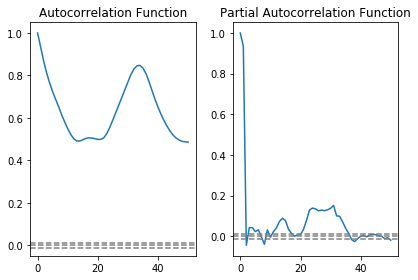

In [32]:
def Plot_ACF_PACF(value):
    lag_acf = acf(value, nlags=50)
    lag_pacf = pacf(value, nlags=50, method='ols')
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value,)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
Plot_ACF_PACF(df.diesel)

In [33]:

Monthly_data=df['2017-9-2':'2017-9-9']
Monthly_data.head(100)

,diesel
2017-09-02 00:00:00,1219
2017-09-02 01:00:00,1219
2017-09-02 02:00:00,1219
2017-09-02 03:00:00,1219
2017-09-02 04:00:00,1219
2017-09-02 05:00:00,1219
2017-09-02 06:00:00,1219
2017-09-02 06:27:00,1129
2017-09-02 07:00:00,1129
2017-09-02 07:15:00,1109


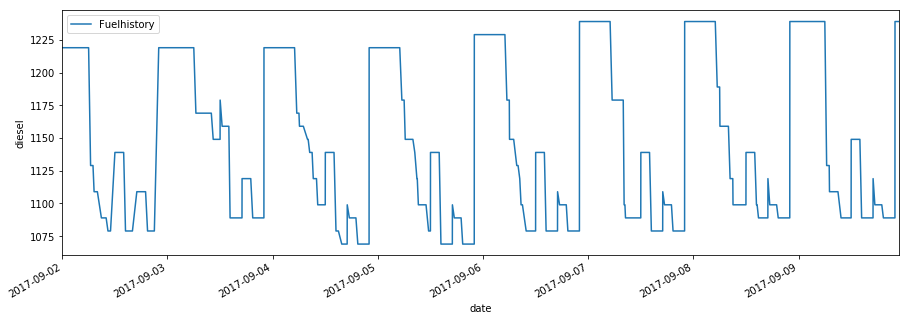

In [34]:
my_plot=Monthly_data.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
my_plot.set_ylabel("diesel")
my_plot.legend(["Fuelhistory"])


In [35]:
df.index.name='date'
df.reset_index(inplace=True)
df.head()


,date,diesel
0,2016-05-02 06:33:00,1029
1,2016-05-02 07:00:00,1029
2,2016-05-02 08:00:00,1029
3,2016-05-02 09:00:00,1029
4,2016-05-02 09:29:00,1029


In [36]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.index

DatetimeIndex(['2016-05-02 06:33:00', '2016-05-02 07:00:00',
               '2016-05-02 08:00:00', '2016-05-02 09:00:00',
               '2016-05-02 09:29:00', '2016-05-02 10:00:00',
               '2016-05-02 10:49:00', '2016-05-02 11:00:00',
               '2016-05-02 12:00:00', '2016-05-02 12:05:00',
               ...
               '2018-10-09 06:00:00', '2018-10-09 07:30:00',
               '2018-10-09 09:11:00', '2018-10-09 12:00:00',
               '2018-10-09 13:24:00', '2018-10-09 13:53:00',
               '2018-10-09 17:00:00', '2018-10-09 17:53:00',
               '2018-10-09 18:01:00', '2018-10-09 22:00:00'],
              dtype='datetime64[ns]', name='date', length=29832, freq=None)

In [37]:

#tf=df['diesel']
#tf.tail()

In [38]:
#split = int(len(tf) / 2)
#print(split)
#X1=X[0:split]
#X2 =X[split:]
#mean1, mean2 = X1.mean(), X2.mean()
#var1, var2 = X1.var(), X2.var()
#print('mean1=%f, mean2=%f' % (mean1, mean2))
#print('variance1=%f, variance2=%f' % (var1, var2))
percent_training=0.9
split_point=round(len(df)*percent_training)
training,testing=df[0:split_point],df[split_point:]

In [39]:
training.describe()

,diesel
count,26849.000000
mean,1153.305933
std,77.079459
min,989.000000
25%,1099.000000
50%,1139.000000
75%,1209.000000
max,1409.000000


In [40]:
testing.describe()

,diesel
count,2983.000000
mean,1287.105934
std,55.873043
min,1189.000000
25%,1249.000000
50%,1279.000000
75%,1319.000000
max,1479.000000


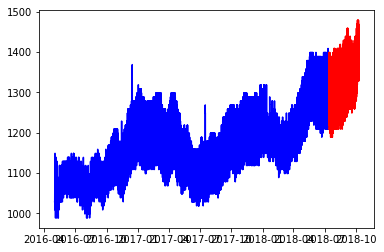

In [41]:
plt.plot(training,'b')
plt.plot(testing,'r')


In [42]:
training=training['diesel']
training.tail()

date
2018-07-13 17:00:00    1259
2018-07-13 17:59:00    1209
2018-07-13 18:00:00    1209
2018-07-13 19:00:00    1209
2018-07-13 20:00:00    1209
Name: diesel, dtype: int32

In [43]:

#Checking the stationery of time series


from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
  

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # Remove the CWD from sys.path while we load stuff.


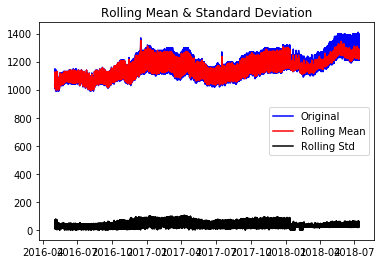

Results of Dickey-Fuller Test:
Test Statistic                    -3.838100
p-value                            0.002541
#Lags Used                        37.000000
Number of Observations Used    26811.000000
Critical Value (1%)               -3.430594
Critical Value (5%)               -2.861648
Critical Value (10%)              -2.566827
dtype: float64


In [44]:
  test_stationarity(training)

In [45]:
#from numpy import log
#X=log(tf)
#split = int(len(X) / 2)
#X1=X[0:split]
#X2 =X[split:]
#mean1, mean2 = X1.mean(), X2.mean()
#var1, var2 = X1.var(), X2.var()
#print('mean1=%f, mean2=%f' % (mean1, mean2))
#print('variance1=%f, variance2=%f' % (var1, var2))

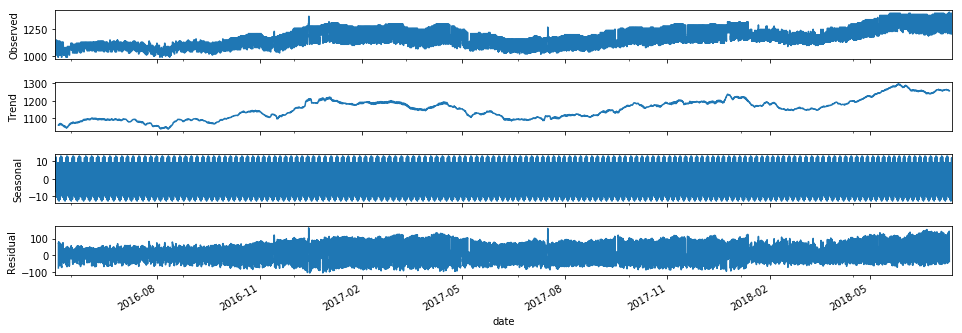

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(training,model="additive",filt=None, freq=168)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
fig = decomposition.plot()
fig.set_size_inches(15, 5)

In [47]:
#training=np.log(training)

In [48]:
#test_stationarity(training)

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # Remove the CWD from sys.path while we load stuff.


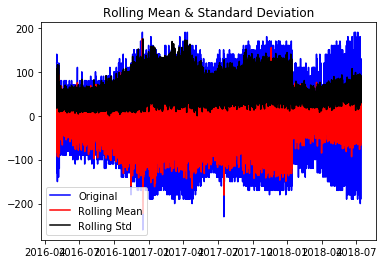

Results of Dickey-Fuller Test:
Test Statistic                   -33.269329
p-value                            0.000000
#Lags Used                        49.000000
Number of Observations Used    26775.000000
Critical Value (1%)               -3.430594
Critical Value (5%)               -2.861648
Critical Value (10%)              -2.566827
dtype: float64


In [49]:
training_Seasonal_difference=training - training.shift(24)
test_stationarity(training_Seasonal_difference.dropna(inplace=False))

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  if __name__ == '__main__':
C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  # Remove the CWD from sys.path while we load stuff.


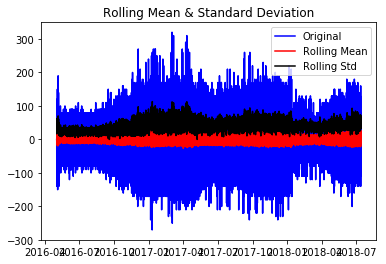

Results of Dickey-Fuller Test:
Test Statistic                   -40.019841
p-value                            0.000000
#Lags Used                        49.000000
Number of Observations Used    26774.000000
Critical Value (1%)               -3.430594
Critical Value (5%)               -2.861648
Critical Value (10%)              -2.566827
dtype: float64


In [50]:
#tf_log_diff=tf_log_diff.iloc[1:]
#tf_log_diff=tf_log(periods=1).values[1:]
#tf_log_diff=tf_log - tf_log.shift(24)
#tf_log_diff.head(100)
training_Seasonal_First_difference=training_Seasonal_difference-training_Seasonal_difference.shift(1)

test_stationarity(training_Seasonal_First_difference.dropna(inplace=False))

In [51]:
training_Seasonal_First_difference.dropna(inplace=True)
residual.dropna(inplace=True)

Text(0.5,0,'date')

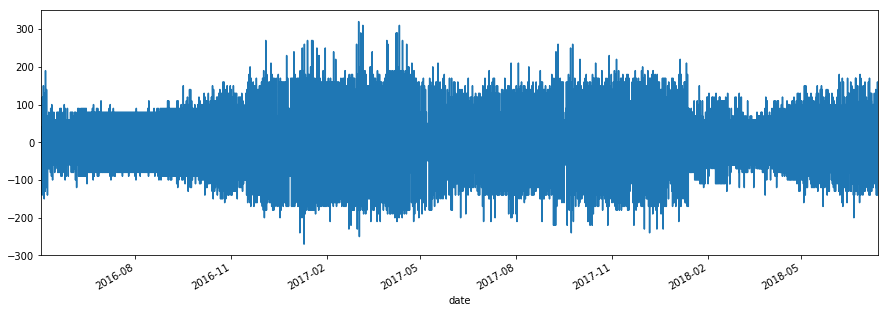

In [52]:
#tf_log_diff=tf_log_diff.iloc[1:]
training_Seasonal_difference.dropna(inplace=True)
my_plot=training_Seasonal_First_difference.plot(kind='line',figsize=(15,5))
my_plot.set_xlabel("date")
#plt.plot(tf_log_diff)

In [53]:
#test_stationarity(tf_log_diff)

In [54]:

#tf_decompose=residual
#tf_decompose.dropna(inplace=True)
#test_stationarity(tf_decompose)

In [55]:
#tf.head()

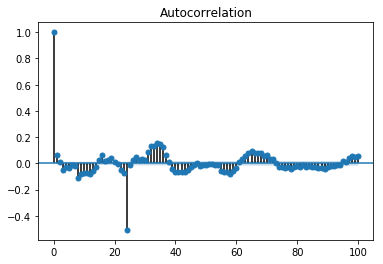

In [56]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(training_Seasonal_First_difference,lags=100)
#plot_acf(residual,lags=50)
pyplot.show()

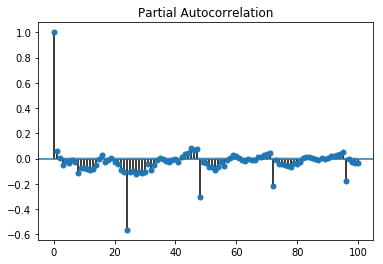

In [57]:
plot_pacf(training_Seasonal_First_difference,lags=100)
pyplot.show()

In [58]:
#tf.head()
#tf_log_diff.head()

In [59]:

#model = ARIMA(tf_log,order=(1,1,1))  
#results_ARIMA = model.fit(disp=-1)  
#plt.plot(tf_log_diff)
#plt.plot(results_ARIMA.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-tf_log_diff)**2))


ARIMA sumarry and residual plots

In [60]:
# Define the p, d and q parameters to take any value between 0 and 2
p =range(0,2)
d =range(0,2)
q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 1, 0, 24)
SARIMAX: (0, 1, 0) x (0, 1, 1, 24)
SARIMAX: (0, 1, 0) x (1, 0, 0, 24)


c4=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(training,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}24 - AIC:{}'.format(param, param_seasonal, results.aic))
            c4.append('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            c4.append(results.aic)
        except:
            continue

In [61]:
model =sm.tsa.statespace.SARIMAX(training.values,order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 24),
                                enforce_stationarity=False,
                                enforce_invertibilit=False)

model_fit = model.fit(disp=0)

print(model_fit.summary())


                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                26849
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -128189.201
Date:                            Tue, 08 Jan 2019   AIC                         256388.402
Time:                                    11:51:05   BIC                         256429.382
Sample:                                         0   HQIC                        256401.622
                                          - 26849                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8403      0.005    170.687      0.000       0.831       0.850
ma.L1         -0.9954      0.001  -

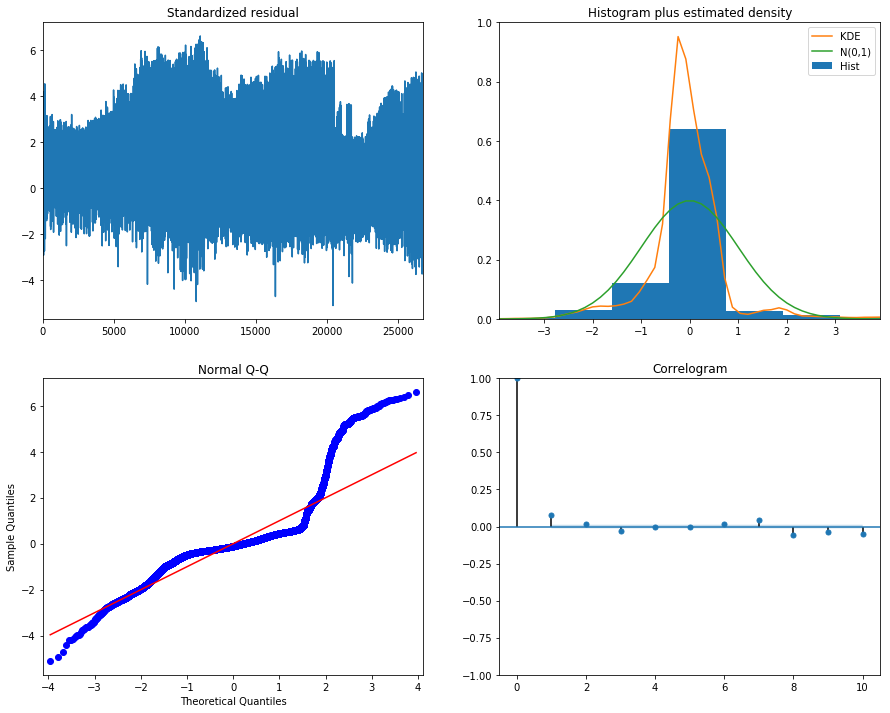

In [62]:
model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

In [63]:
print(model_fit)

In [64]:
testing.head()

,diesel
date,
2018-07-13 21:00:00,1209
2018-07-13 22:00:00,1209
2018-07-13 22:01:00,1259
2018-07-13 23:00:00,1259
2018-07-14 00:00:00,1259


In [65]:
#testing['forecast']=model_fit.predict(start =28341, end = 29832, dynamic=False)

#plt.plot(df,'b')
#plt.plot(testing['forecast'],'r');
#testing[['diesel', 'forecast']].plot(figsize=(12, 8))


In [66]:
testing.head(100)

,diesel
date,
2018-07-13 21:00:00,1209
2018-07-13 22:00:00,1209
2018-07-13 22:01:00,1259
2018-07-13 23:00:00,1259
2018-07-14 00:00:00,1259
2018-07-14 01:00:00,1259
2018-07-14 02:00:00,1259
2018-07-14 03:00:00,1259
2018-07-14 04:00:00,1259


date
2018-07-13 21:00:00    1217.385651
2018-07-13 22:00:00    1216.143032
2018-07-13 22:01:00    1220.907063
2018-07-13 23:00:00    1231.985744
2018-07-14 00:00:00    1236.037181
2018-07-14 01:00:00    1238.808683
2018-07-14 02:00:00    1244.292894
2018-07-14 03:00:00    1245.516172
2018-07-14 04:00:00    1248.717486
2018-07-14 05:00:00    1252.131504
2018-07-14 06:00:00    1253.218018
2018-07-14 07:00:00    1254.910694
2018-07-14 07:33:00    1251.540717
2018-07-14 08:00:00    1251.792277
2018-07-14 08:48:00    1254.693698
2018-07-14 09:00:00    1257.324171
2018-07-14 10:00:00    1258.252033
2018-07-14 10:19:00    1258.281935
2018-07-14 11:00:00    1258.096206
2018-07-14 12:00:00    1255.238393
2018-07-14 12:32:00    1257.376775
2018-07-14 13:00:00    1258.176691
2018-07-14 13:19:00    1259.313329
2018-07-14 13:38:00    1259.828412
2018-07-14 14:00:00    1260.101399
2018-07-14 15:00:00    1260.898870
2018-07-14 16:00:00    1260.004050
2018-07-14 17:00:00    1259.335173
2018-07-14 17:3

C:\Users\Bibek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


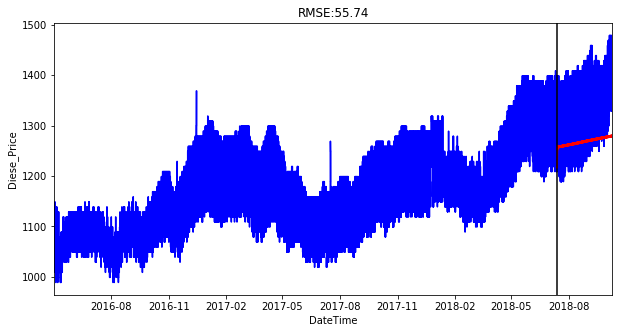

In [69]:
K=len(testing)
testing['forecast']=model_fit.forecast(K)
#forecast=forecast.astype(int)
#forecast=np.exp(forecast)
print(testing['forecast'])
#plot forecast results and display RMSE
plt.figure(figsize=(10,5))
plt.plot(df,'b');
plt.plot(testing['forecast'],'r');

plt.title('RMSE:%.2f'% np.sqrt(sum((testing['diesel']-testing['forecast'])**2)/len(testing)));
plt.xlabel("DateTime");
plt.ylabel("Diese_Price");
plt.autoscale(enable=True,axis='x',tight=True)
plt.axvline(x=df.index[split_point],color='black');#line separates training/testing

In [71]:
test=testing['2018-8-2':'2018-8-9']
test.head()

,diesel,forecast
date,,
2018-08-02 00:00:00,1259,1263.481363
2018-08-02 01:00:00,1259,1263.226719
2018-08-02 02:00:00,1259,1262.621299
2018-08-02 03:00:00,1259,1261.919234
2018-08-02 04:00:00,1259,1261.397278


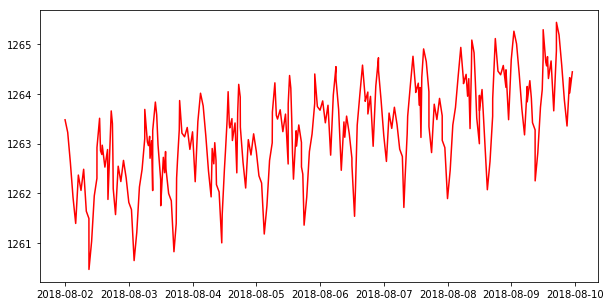

In [72]:

plt.figure(figsize=(10,5))
plt.plot(test['forecast'],'r');